In [5]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/btc_dataset.csv")

**Modeling stock returns’ volatility with ARCH models**

In [6]:
!pip install arch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.4/916.4 kB 20.5 MB/s eta 0:00:00


In [7]:
from arch import arch_model

based on data visualisation, we can observe a few sudden spikes and clear examples of volatility clustering.



In [8]:
returns = data['close'].pct_change().dropna()


In [9]:
model = arch_model(returns, mean="Zero", vol="ARCH", p=1, q=0)


In [10]:
fitted_model = model.fit(disp="off")
print(fitted_model.summary())


                        Zero Mean - ARCH Model Results                        
Dep. Variable:                  close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                158236.
Distribution:                  Normal   AIC:                          -316468.
Method:            Maximum Likelihood   BIC:                          -316451.
                                        No. Observations:                44418
Date:                Tue, Sep 12 2023   Df Residuals:                    44418
Time:                        12:47:35   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      3.2916e-05  3.974e-07     82.829      0.000 [3.

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.985e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


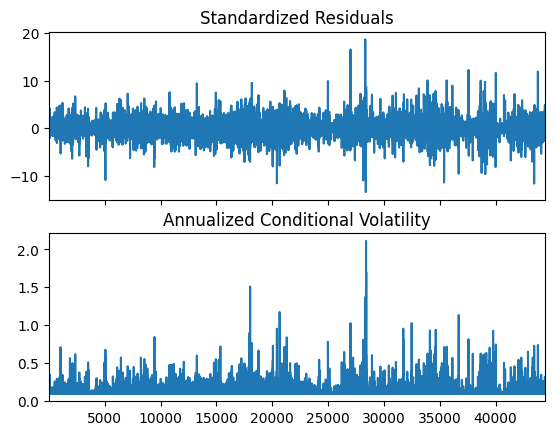

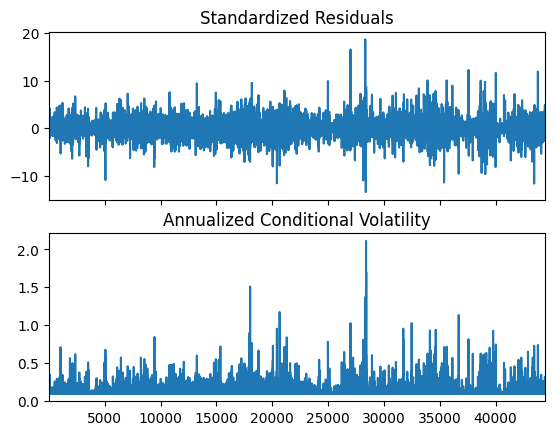

In [11]:
fitted_model.plot(annualize="D")

Engle, R. F. 1982., “Autoregressive conditional heteroscedasticity with estimates of the variance of United Kingdom inflation,” Econometrica, 50(4): 987-1007


**Modeling stock returns’ volatility with GARCH models**

In [12]:
model = arch_model(returns, mean="Zero", vol="GARCH", p=1, q=1)


In [13]:
fitted_model = model.fit(disp="off")
print(fitted_model.summary())


                       Zero Mean - GARCH Model Results                        
Dep. Variable:                  close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                162262.
Distribution:                  Normal   AIC:                          -324519.
Method:            Maximum Likelihood   BIC:                          -324493.
                                        No. Observations:                44418
Date:                Tue, Sep 12 2023   Df Residuals:                    44418
Time:                        12:47:36   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.1969e-06  1.705e-11  7.019e+04      0.000 [1.

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.985e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


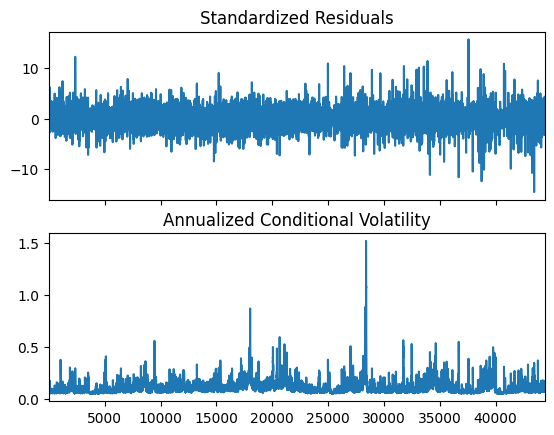

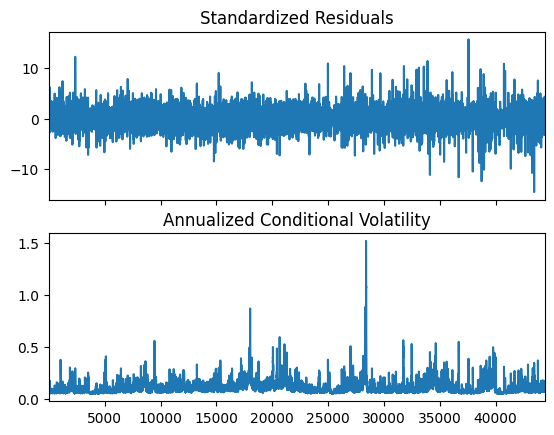

In [14]:
fitted_model.plot(annualize="D")


GJR-GARCH: A variant of the GARCH model that takes into account the asymmetry of the returns (negative returns tend to have a stronger impact on volatility than positive ones)
EGARCH: Exponential GARCH
TGARCH: Threshold GARCH
FIGARCH: Fractionally integrated GARCH, used with non-stationary data
GARCH-MIDAS: In this class of models, volatility is decomposed into a short-term GARCH component and a long-term component driven by an additional explanatory variable
Multivariate GARCH models, such as CCC-/DCC-GARCH

GJR-GARCH: A variant of the GARCH model that takes into account the asymmetry of the returns (negative returns tend to have a stronger impact on volatility than positive ones)
EGARCH: Exponential GARCH
TGARCH: Threshold GARCH
FIGARCH: Fractionally integrated GARCH, used with non-stationary data
GARCH-MIDAS: In this class of models, volatility is decomposed into a short-term GARCH component and a long-term component driven by an additional explanatory variable
Multivariate GARCH models, such as CCC-/DCC-GARCH

In [15]:
model = arch_model(returns, mean="Zero", vol="GARCH", dist="t",
                   p=1, q=1)


In [16]:
from datetime import datetime
from arch import arch_model
import pandas as pd

# Make sure your 'unix' and 'close' columns exist in your DataFrame
print(data.columns)

# Convert 'unix' column to datetime format and set it as index
data['date'] = pd.to_datetime(data['unix'], unit='s')
data.set_index('date', inplace=True)

# Use the 'close' price data
daily_data = data['close'].resample('D').ffill()

# Calculate returns
returns = daily_data.pct_change().dropna()

# Create and fit GARCH model
model = arch_model(returns, mean="Zero", vol="GARCH", dist="Normal", p=1, q=1)

# Fit the model
fitted_model = model.fit(disp="off")

# Print summary of the fitted model
print(fitted_model.summary())


Index(['unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'Volume BTC',
       'Volume USD'],
      dtype='object')
                       Zero Mean - GARCH Model Results                        
Dep. Variable:                  close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:                3473.19
Distribution:                  Normal   AIC:                          -6940.38
Method:            Maximum Likelihood   BIC:                          -6923.81
                                        No. Observations:                 1850
Date:                Tue, Sep 12 2023   Df Residuals:                     1850
Time:                        12:47:37   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
------------

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001469. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


ARIMA model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                44418
Model:                 ARIMA(1, 1, 1)   Log Likelihood              152910.533
Date:                Tue, 12 Sep 2023   AIC                        -305815.066
Time:                        12:48:02   BIC                        -305788.961
Sample:                             0   HQIC                       -305806.843
                              - 44418                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0220      0.002    -14.595      0.000      -0.025      -0.019
ma.L1         -0.9998      0.010   -105.058      0.000      -1.018      -0.981
sigma2      5.961e-05    5.5e-07    108.321      0.0

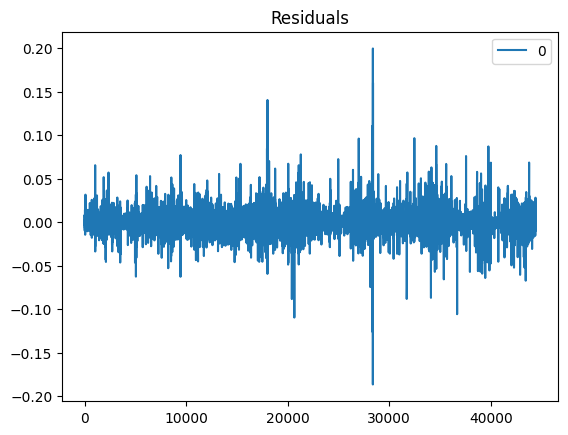

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm  # Import the statsmodels library

data = pd.read_csv("/content/btc_dataset.csv")

returns = data['close'].pct_change().dropna()

arima_p = 1
arima_d = 1
arima_q = 1

model = sm.tsa.ARIMA(returns, order=(arima_p, arima_d, arima_q))  # Use the ARIMA class from statsmodels
fitted_model = model.fit()

print(fitted_model.summary())

residuals = pd.DataFrame(fitted_model.resid)
residuals.plot(title="Residuals")
plt.show()





Perfomance Analysis

In [18]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load your BTC dataset
data = pd.read_csv("/content/btc_dataset.csv")

# Calculate returns and drop missing values
returns = data['close'].pct_change().dropna()

# ARIMA Model
arima_order = (1, 1, 1)
arima_model = ARIMA(returns, order=arima_order)
arima_fitted_model = arima_model.fit()
arima_predictions = arima_fitted_model.forecast(steps=len(returns))
arima_mse = mean_squared_error(returns, arima_predictions)
arima_mae = mean_absolute_error(returns, arima_predictions)
arima_rmse = np.sqrt(arima_mse)
arima_r2 = r2_score(returns, arima_predictions)

# GARCH Model
garch_model = arch_model(returns, mean="Zero", vol="GARCH", p=1, q=1)
garch_fitted_model = garch_model.fit(disp="off")
garch_predictions = garch_fitted_model.conditional_volatility
garch_mse = mean_squared_error(returns, garch_predictions)
garch_mae = mean_absolute_error(returns, garch_predictions)
garch_rmse = np.sqrt(garch_mse)
garch_r2 = r2_score(returns, garch_predictions)

# ARCH Model
arch_model = arch_model(returns, mean="Zero", vol="ARCH", p=1, q=0)
arch_fitted_model = arch_model.fit(disp="off")
arch_predictions = arch_fitted_model.conditional_volatility
arch_mse = mean_squared_error(returns, arch_predictions)
arch_mae = mean_absolute_error(returns, arch_predictions)
arch_rmse = np.sqrt(arch_mse)
arch_r2 = r2_score(returns, arch_predictions)

# Create a dictionary to store the metrics for each model
metrics = {
    "ARIMA": {"MSE": arima_mse, "MAE": arima_mae, "RMSE": arima_rmse, "R^2": arima_r2},
    "GARCH": {"MSE": garch_mse, "MAE": garch_mae, "RMSE": garch_rmse, "R^2": garch_r2},
    "ARCH": {"MSE": arch_mse, "MAE": arch_mae, "RMSE": arch_rmse, "R^2": arch_r2},
}

# Determine the best-performing model based on a chosen metric (e.g., MSE)
best_model = min(metrics, key=lambda x: metrics[x]["MSE"])

# Print and compare metrics
print("Model Metrics:")
for model_name, model_metrics in metrics.items():
    print(f"{model_name}:")
    print(f"MSE: {model_metrics['MSE']}, MAE: {model_metrics['MAE']}, RMSE: {model_metrics['RMSE']}, R^2: {model_metrics['R^2']}")

print(f"Best Model: {best_model}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integ

Model Metrics:
ARIMA:
MSE: 5.9973083710520676e-05, MAE: 0.004535246213777749, RMSE: 0.007744229058500315, R^2: -0.0021138025892830647
GARCH:
MSE: 0.00011659538647878896, MAE: 0.007883100680087707, RMSE: 0.010797934361663297, R^2: -0.9482380908175565
ARCH:
MSE: 0.00011733795645961885, MAE: 0.008193206797718641, RMSE: 0.010832264604394543, R^2: -0.9606459841780168
Best Model: ARIMA


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.985e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.985e-05. Parameter
estimation work better when this value is between 1 and 1000. The recomme

**various diagnostic plots **

We fit ARIMA, GARCH, and ARCH models to the BTC returns data.
We plot the residuals of each model to check for patterns or heteroskedasticity.
We also plot the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) of the residuals to identify any remaining autocorrelation.
These diagnostic plots help assess the fitness of each model and can guide further refinements in model selection or parameter tuning. Look for white noise-like residuals with no significant patterns in the residuals plots and for no significant spikes in the ACF and PACF plots to indicate a well-fitted model.







/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the

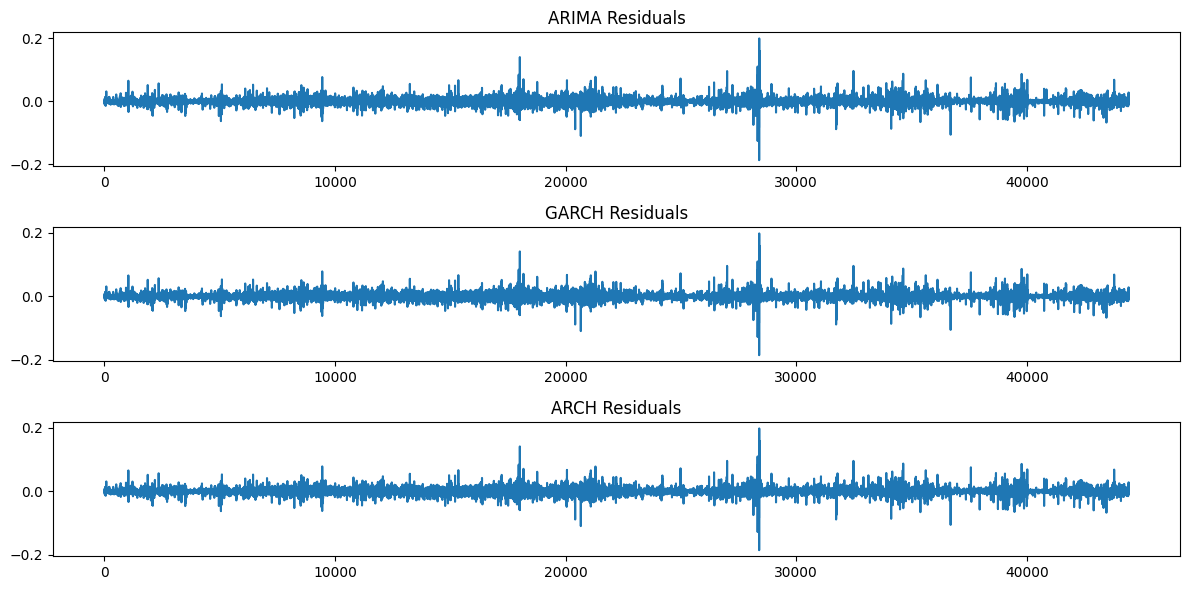

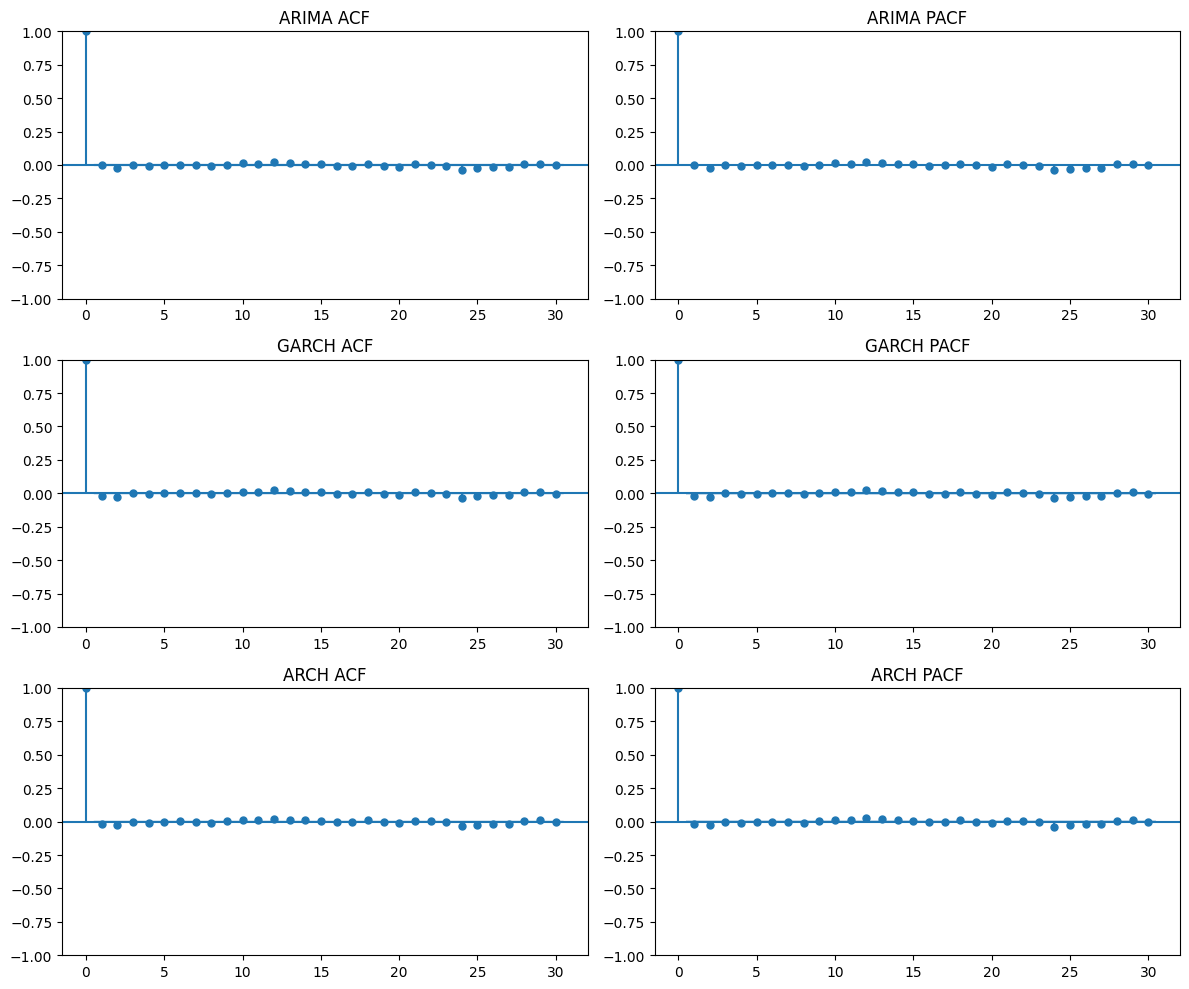

In [19]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load your BTC dataset
data = pd.read_csv("/content/btc_dataset.csv")

# Assuming you have a 'close' column for BTC prices
# You may need to preprocess the data if it's not in the right format

# Calculate returns and drop missing values
returns = data['close'].pct_change().dropna()

# ARIMA Model
arima_order = (1, 1, 1)
arima_model = ARIMA(returns, order=arima_order)
arima_fitted_model = arima_model.fit()

# GARCH Model
garch_model = arch_model(returns, mean="Zero", vol="GARCH", p=1, q=1)
garch_fitted_model = garch_model.fit(disp="off")

# ARCH Model
arch_model = arch_model(returns, mean="Zero", vol="ARCH", p=1, q=0)
arch_fitted_model = arch_model.fit(disp="off")

# Residuals for ARIMA
arima_residuals = arima_fitted_model.resid

# Residuals for GARCH
garch_residuals = garch_fitted_model.resid

# Residuals for ARCH
arch_residuals = arch_fitted_model.resid

# Plot the residuals
plt.figure(figsize=(12, 6))

plt.subplot(311)
plt.plot(arima_residuals)
plt.title("ARIMA Residuals")

plt.subplot(312)
plt.plot(garch_residuals)
plt.title("GARCH Residuals")

plt.subplot(313)
plt.plot(arch_residuals)
plt.title("ARCH Residuals")

plt.tight_layout()
plt.show()

# Plot ACF and PACF plots for residuals
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# ARIMA ACF and PACF
sm.graphics.tsa.plot_acf(arima_residuals, lags=30, ax=axes[0, 0])
sm.graphics.tsa.plot_pacf(arima_residuals, lags=30, ax=axes[0, 1])
axes[0, 0].set_title("ARIMA ACF")
axes[0, 1].set_title("ARIMA PACF")

# GARCH ACF and PACF
sm.graphics.tsa.plot_acf(garch_residuals, lags=30, ax=axes[1, 0])
sm.graphics.tsa.plot_pacf(garch_residuals, lags=30, ax=axes[1, 1])
axes[1, 0].set_title("GARCH ACF")
axes[1, 1].set_title("GARCH PACF")

# ARCH ACF and PACF
sm.graphics.tsa.plot_acf(arch_residuals, lags=30, ax=axes[2, 0])
sm.graphics.tsa.plot_pacf(arch_residuals, lags=30, ax=axes[2, 1])
axes[2, 0].set_title("ARCH ACF")
axes[2, 1].set_title("ARCH PACF")

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the

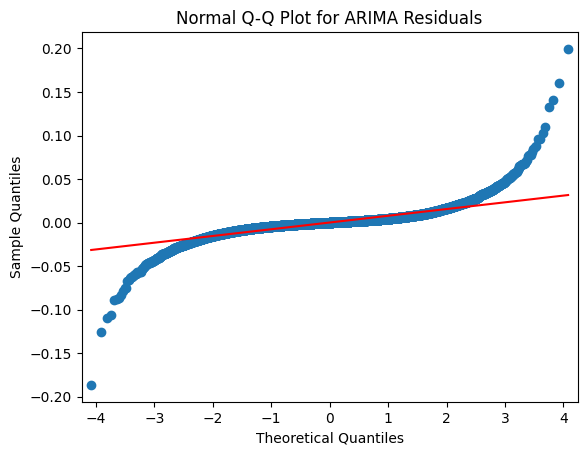

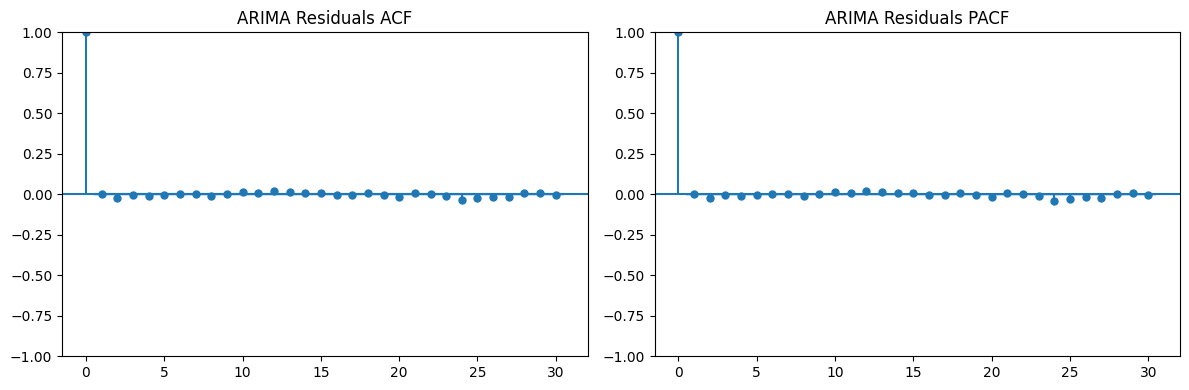

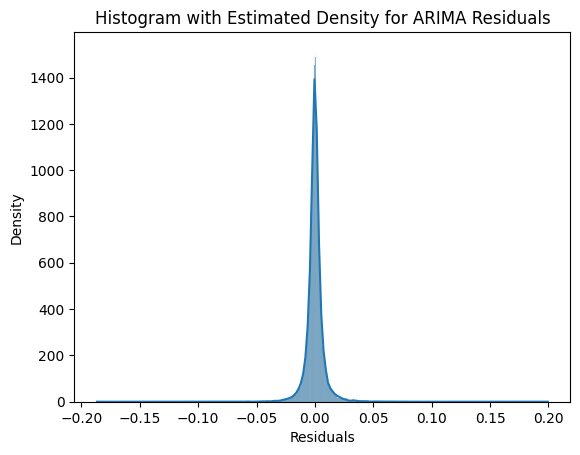

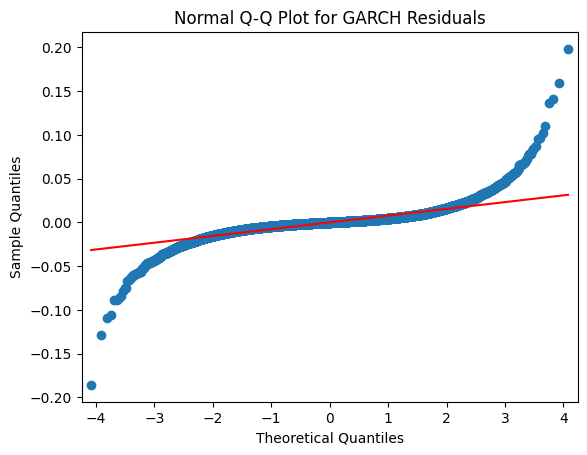

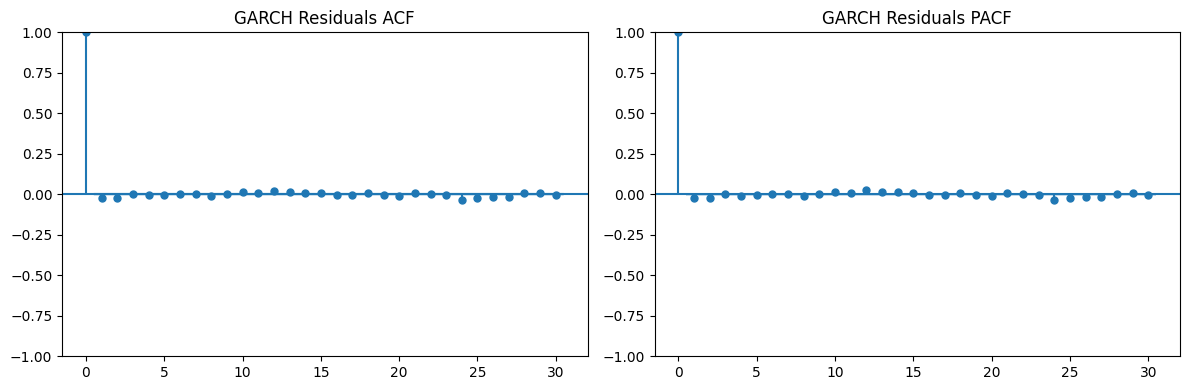

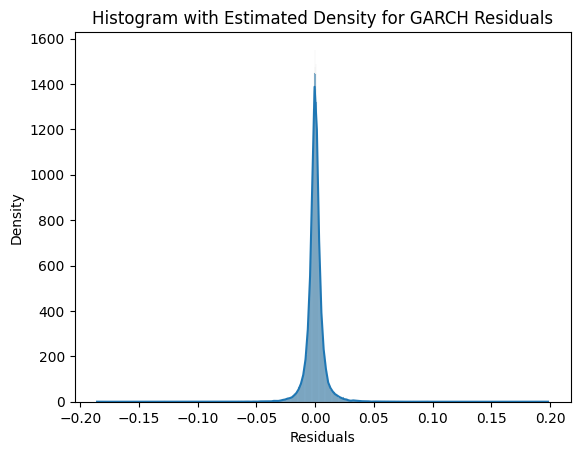

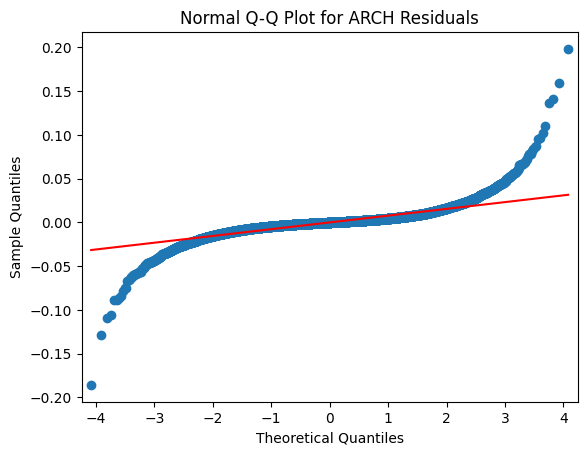

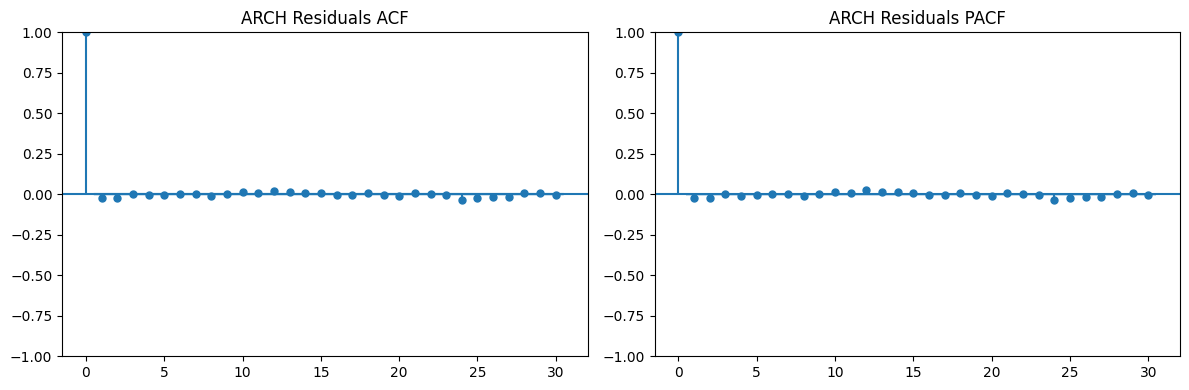

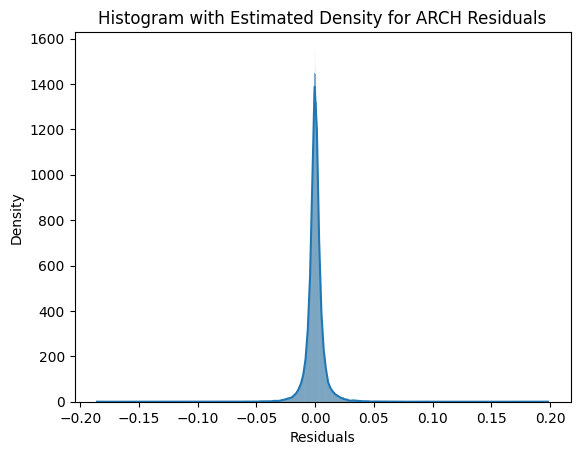

In [20]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

# Load your BTC dataset
data = pd.read_csv("/content/btc_dataset.csv")

# Assuming you have a 'close' column for BTC prices
# You may need to preprocess the data if it's not in the right format

# Calculate returns and drop missing values
returns = data['close'].pct_change().dropna()

# ARIMA Model
arima_order = (1, 1, 1)
arima_model = ARIMA(returns, order=arima_order)
arima_fitted_model = arima_model.fit()

# GARCH Model
garch_model = arch_model(returns, mean="Zero", vol="GARCH", p=1, q=1)
garch_fitted_model = garch_model.fit(disp="off")

# ARCH Model
arch_model = arch_model(returns, mean="Zero", vol="ARCH", p=1, q=0)
arch_fitted_model = arch_model.fit(disp="off")

# Residuals for ARIMA
arima_residuals = arima_fitted_model.resid

# Residuals for GARCH
garch_residuals = garch_fitted_model.resid

# Residuals for ARCH
arch_residuals = arch_fitted_model.resid

# Normal Q-Q Plot for ARIMA Residuals
sm.qqplot(arima_residuals, line='s')
plt.title("Normal Q-Q Plot for ARIMA Residuals")
plt.show()

# Correlogram for ARIMA Residuals
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sm.graphics.tsa.plot_acf(arima_residuals, lags=30, ax=axes[0])
sm.graphics.tsa.plot_pacf(arima_residuals, lags=30, ax=axes[1])
axes[0].set_title("ARIMA Residuals ACF")
axes[1].set_title("ARIMA Residuals PACF")
plt.tight_layout()
plt.show()

# Histogram with Estimated Density for ARIMA Residuals
sns.histplot(arima_residuals, kde=True)
plt.title("Histogram with Estimated Density for ARIMA Residuals")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.show()

# Normal Q-Q Plot for GARCH Residuals
sm.qqplot(garch_residuals, line='s')
plt.title("Normal Q-Q Plot for GARCH Residuals")
plt.show()

# Correlogram for GARCH Residuals
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sm.graphics.tsa.plot_acf(garch_residuals, lags=30, ax=axes[0])
sm.graphics.tsa.plot_pacf(garch_residuals, lags=30, ax=axes[1])
axes[0].set_title("GARCH Residuals ACF")
axes[1].set_title("GARCH Residuals PACF")
plt.tight_layout()
plt.show()

# Histogram with Estimated Density for GARCH Residuals
sns.histplot(garch_residuals, kde=True)
plt.title("Histogram with Estimated Density for GARCH Residuals")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.show()

# Normal Q-Q Plot for ARCH Residuals
sm.qqplot(arch_residuals, line='s')
plt.title("Normal Q-Q Plot for ARCH Residuals")
plt.show()

# Correlogram for ARCH Residuals
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sm.graphics.tsa.plot_acf(arch_residuals, lags=30, ax=axes[0])
sm.graphics.tsa.plot_pacf(arch_residuals, lags=30, ax=axes[1])
axes[0].set_title("ARCH Residuals ACF")
axes[1].set_title("ARCH Residuals PACF")
plt.tight_layout()
plt.show()

# Histogram with Estimated Density for ARCH Residuals
sns.histplot(arch_residuals, kde=True)
plt.title("Histogram with Estimated Density for ARCH Residuals")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.show()

